# Handwritten Digit Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
target = pd.Series(digits.target, name="Target")
images = pd.DataFrame(digits.data)
images.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [2]:
print(target.shape)
print(digits.images.shape)

(1797,)
(1797, 8, 8)


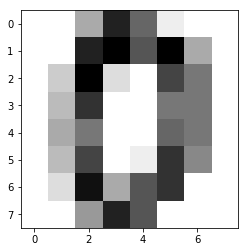

In [3]:
#Visualize first digit from the dataset
%matplotlib inline
first_image = images.iloc[0,:]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

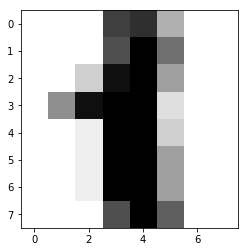

In [4]:
#visualize 2nd image from the dataset
second_image = images.iloc[1,:]
np_image = second_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

In [5]:
# import modules for analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [12]:
# define test and train data subsets for custom functions:
combined=pd.concat([images,target],axis=1).sample(frac=1,random_state=1)
test = combined.iloc[int(len(combined)*0.75):,:]
train = combined.iloc[:int(len(combined)*0.75),:]

In [13]:
#define functions that will produce predictions for test and train subsets:

def eval_knn(train,test,k):
    mod=KNeighborsClassifier(n_neighbors=k)
    mod.fit(train.iloc[:,:-1],train.iloc[:,-1:].values.ravel())
    predicted_test = mod.predict(test.iloc[:,:-1])
    predicted_train = mod.predict(train.iloc[:,:-1])
    test_score = f1_score(test.iloc[:,-1:],predicted_test,average='micro')
    train_score = f1_score(train.iloc[:,-1:],predicted_train,average='micro')
    return test_score, train_score

def eval_mpl_one_layer(train,test,a):
    mod=MLPClassifier(hidden_layer_sizes=(a,),max_iter=100)
    mod.fit(train.iloc[:,:-1],train.iloc[:,-1:].values.ravel())
    predicted_test = mod.predict(test.iloc[:,:-1])
    predicted_train = mod.predict(train.iloc[:,:-1])
    test_score = f1_score(test.iloc[:,-1:],predicted_test,average='micro')
    train_score = f1_score(train.iloc[:,-1:],predicted_train,average='micro')
    return test_score, train_score

def eval_mpl_two_layers(train,test,a,b):
    mod=MLPClassifier(hidden_layer_sizes=(a,b),batch_size=20)
    mod.fit(train.iloc[:,:-1],train.iloc[:,-1:].values.ravel())
    predicted_test = mod.predict(test.iloc[:,:-1])
    predicted_train = mod.predict(train.iloc[:,:-1])
    test_score = f1_score(test.iloc[:,-1:],predicted_test,average='micro')
    train_score = f1_score(train.iloc[:,-1:],predicted_train,average='micro')
    return test_score, train_score

def eval_mpl_three_layers(train,test,a,b,c):
    mod=MLPClassifier(hidden_layer_sizes=(a,b,c),batch_size=20)
    mod.fit(train.iloc[:,:-1],train.iloc[:,-1:].values.ravel())
    predicted_test = mod.predict(test.iloc[:,:-1])
    predicted_train = mod.predict(train.iloc[:,:-1])
    test_score = f1_score(test.iloc[:,-1:],predicted_test,average='micro')
    train_score = f1_score(train.iloc[:,-1:],predicted_train,average='micro')
    return test_score, train_score

## Experiment with KNeighborsClassifier

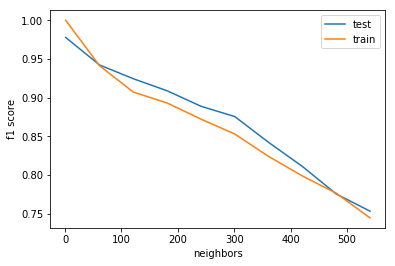

In [14]:
f1_test=[]
f1_train=[]
for item in np.arange(1,600,60):
    test_f1,train_f1 = eval_knn(train,test,item)
    f1_test.append(test_f1)
    f1_train.append(train_f1)
    
plt.plot(np.arange(1,600,60),f1_test, label="test")
plt.plot(np.arange(1,600,60),f1_train, label="train")
plt.legend()
plt.ylabel("f1 score")
plt.xlabel("neighbors")
plt.show()

## Experiment with Neural Network, 1 layer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

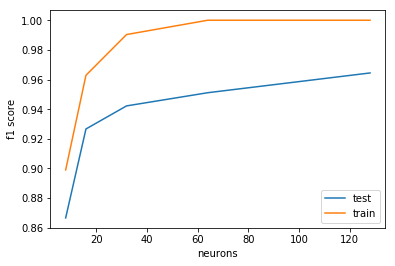

In [15]:
neurons=[8,16,32,64,128]

f1_test=[]
f1_train=[]
for item in neurons:
    test_f1,train_f1 = eval_mpl_one_layer(train,test,item)
    f1_test.append(test_f1)
    f1_train.append(train_f1)
    
plt.plot(neurons,f1_test, label="test")
plt.plot(neurons,f1_train, label="train")
plt.legend()
plt.ylabel("f1 score")
plt.xlabel("neurons")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

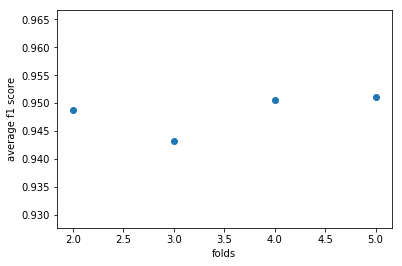

In [16]:
def cross_validate(k):

    mod=MLPClassifier(hidden_layer_sizes=(10,),batch_size=20)
    kf = KFold(k, shuffle = True, random_state=1)
    f1 = cross_val_score(mod ,images,target, scoring = "f1_micro", cv=kf) 
    av=np.mean(f1)
    return av

scores=[]
for k in np.arange(2,6,1):
        a=cross_validate(k)
        scores.append(a)
plt.scatter(np.arange(2,6,1),scores)
plt.ylabel("average f1 score")
plt.xlabel("folds")
plt.show()

## Experiment with Neural Network, 1 layer, different neuron numbers

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


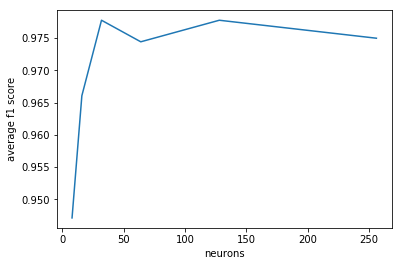

In [18]:
neurons_layer1=[8,16,32,64,128,256]
f1_list=[]
for item in neurons_layer1:
    mod=MLPClassifier(hidden_layer_sizes=(item,),batch_size=20)
    kf = KFold(4, shuffle = True, random_state=1)
    f1 = cross_val_score(mod ,images,target, scoring = "f1_micro", cv=kf) 
    av=np.mean(f1)
    f1_list.append(av)

plt.plot(neurons_layer1,f1_list)
plt.ylabel("average f1 score")
plt.xlabel("neurons")
plt.show()

## Experiment with Neural Network, 2 layers, equal neuron numbers

In [21]:
mod=MLPClassifier(hidden_layer_sizes=(64,64),batch_size=20)
kf = KFold(4, shuffle = True, random_state=1)
f1 = cross_val_score(mod ,images,target, scoring = "f1_micro", cv=kf) 
av=np.mean(f1)
print(av)

0.9749542192526602


## Experiment with Neural Network, 2 layers, different neuron numbers

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


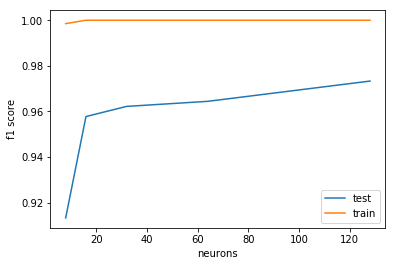

In [22]:
neurons_layer1=[8,16,32,64,128]
neurons_layer2=[8,16,32,64,128]

f1_test=[]
f1_train=[]
for item1, item2 in zip(neurons_layer1,neurons_layer2):
    test_f1,train_f1 = eval_mpl_two_layers(train,test,item1, item2)
    f1_test.append(test_f1)
    f1_train.append(train_f1)
    
plt.plot(neurons_layer1,f1_test, label="test")
plt.plot(neurons_layer1,f1_train, label="train")
plt.legend()
plt.ylabel("f1 score")
plt.xlabel("neurons")
plt.show()

## Experiment with Neural Network, 3 layers, different neuron numbers

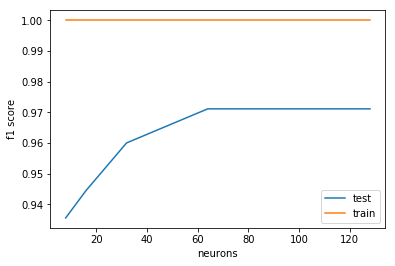

In [23]:
neurons_layer1=[8,16,32,64,128]
neurons_layer2=[8,16,32,64,128]
neurons_layer3=[8,16,32,64,128]
f1_test=[]
f1_train=[]
for item1, item2, item3 in zip(neurons_layer1,neurons_layer2,neurons_layer3):
    test_f1,train_f1 = eval_mpl_three_layers(train,test,item1, item2,item3)
    f1_test.append(test_f1)
    f1_train.append(train_f1)
    
plt.plot(neurons_layer1,f1_test, label="test")
plt.plot(neurons_layer1,f1_train, label="train")
plt.legend()
plt.ylabel("f1 score")
plt.xlabel("neurons")
plt.show()

In [25]:
mod=MLPClassifier(hidden_layer_sizes=(128,),max_iter=100)
mod.fit(train.iloc[:,:-1],train.iloc[:,-1:].values.ravel())
predicted_test = mod.predict(test.iloc[:,:-1])
test_score = f1_score(test.iloc[:,-1:],predicted_test,average='micro')
print(test_score)
confusion_matrix(test.iloc[:,-1:],predicted_test)

0.9688888888888889


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 34,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  1,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 42]], dtype=int64)

In [32]:
mod=KNeighborsClassifier(n_neighbors=4)
mod.fit(train.iloc[:,:-1],train.iloc[:,-1:].values.ravel())
predicted_test = mod.predict(test.iloc[:,:-1])
test_score = f1_score(test.iloc[:,-1:],predicted_test,average='micro')
print(test_score)
confusion_matrix(test.iloc[:,-1:],predicted_test)

0.98


array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  5,  1,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 42]], dtype=int64)

# Conclusions

Both KNeighbors and Neural Network classifiers provided excellent performance for the provided data set!